In [36]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import pickle
from utils.measure import print_measure_performance

In [37]:
filename = "data/VehiclesItaly.txt"

x = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        x.append(xt)
        y.append(yt)

In [38]:
# 拆分 测试和训练 数据集
# Train / test split
num_training = int(0.8 * len(x))
num_test = len(x) - num_training
print(num_training)
print(num_test)

16
4


In [39]:
# 训练数据
x_train = np.array(x[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

In [40]:
# 测试数据
x_test = np.array(x[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

In [41]:
def plot(title):
    plt.figure()
    plt.scatter(x_train, y_train, color='green')
    plt.plot(x_train, y_train_pred, color='black', linewidth=4)
    plt.title(title)
    plt.show()

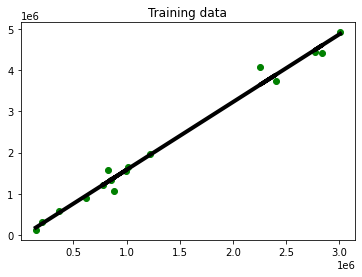

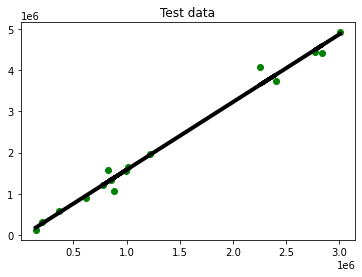

In [44]:
# 创建线性回归对象
linear_regressor = linear_model.LinearRegression()
# 用训练数据集训练模型
linear_regressor.fit(x_train, y_train)

# 拟合
y_train_pred = linear_regressor.predict(x_train)
plot('Training data')

y_test_pred = linear_regressor.predict(x_test)
plot('Test data')
# print_measure_performance(y_test, y_test_pred)

In [47]:
# model persistence 保存模型
output_model_file = "data/model/model_linear_regr.pkl"

with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

with open(output_model_file, 'rb') as f:
    model_lineregr = pickle.load(f)

y_test_pred_new = model_lineregr.predict(x_test)
print("New mean absolute error = ", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)

ridge_regressor.fit(x_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(x_test)
# print_measure_performance(y_test, y_test_pred_ridge)

New mean absolute error =  241907.27
